# Understanding Mall customers

In this exercise, you work for a consulting firm as data scientist. In this scenario, your client is the owner of a Mall and he wants to understand the customers who can easily buy.  

You dispose of a dataset from the mall dataset with 5 features :
- CustomerID of the customer
- Gender of the customer
- Age of the customer
- Annual Income of the customer in k$
- Spending Score assigned by the mall based on customer behavior and spending nature (1-99)


You have one day to perform this analysis

In [1]:
# IMPORTING PACKAGES

import pandas as pd # working with data
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from mpl_toolkits.mplot3d import Axes3D # 3d plot
#from termcolor import colored as cl # text customization

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm

plt.rcParams['figure.figsize'] = (20, 10)
sb.set_style('whitegrid')
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
encodeur = preprocessing.LabelEncoder()

In [2]:
mall_df = pd.read_csv('https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/b403357c-9456-4e37-acbf-ac5e679a7039.csv')
mall_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
mall_df.drop(['CustomerID'], inplace = True, axis = 1)

In [4]:
mall_df["Gender"] =encodeur.fit_transform(mall_df["Gender"])

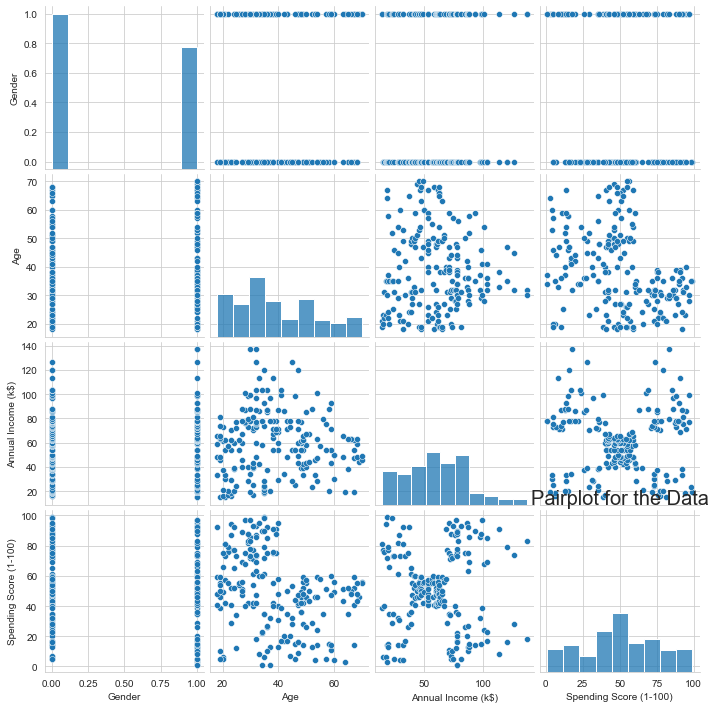

In [5]:
sns.pairplot(mall_df)
plt.rcParams['figure.figsize'] = (25, 8)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

# Customer Segmentation using different clustering methods

Try to perform different Clustering methods (e.g. k-means, agglomerative, DBSCAN, Gaussian) to create clusters and understand behaviors

https://machinelearningmastery.com/clustering-algorithms-with-python/

https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64


C:\Users\Imen\anaconda31\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


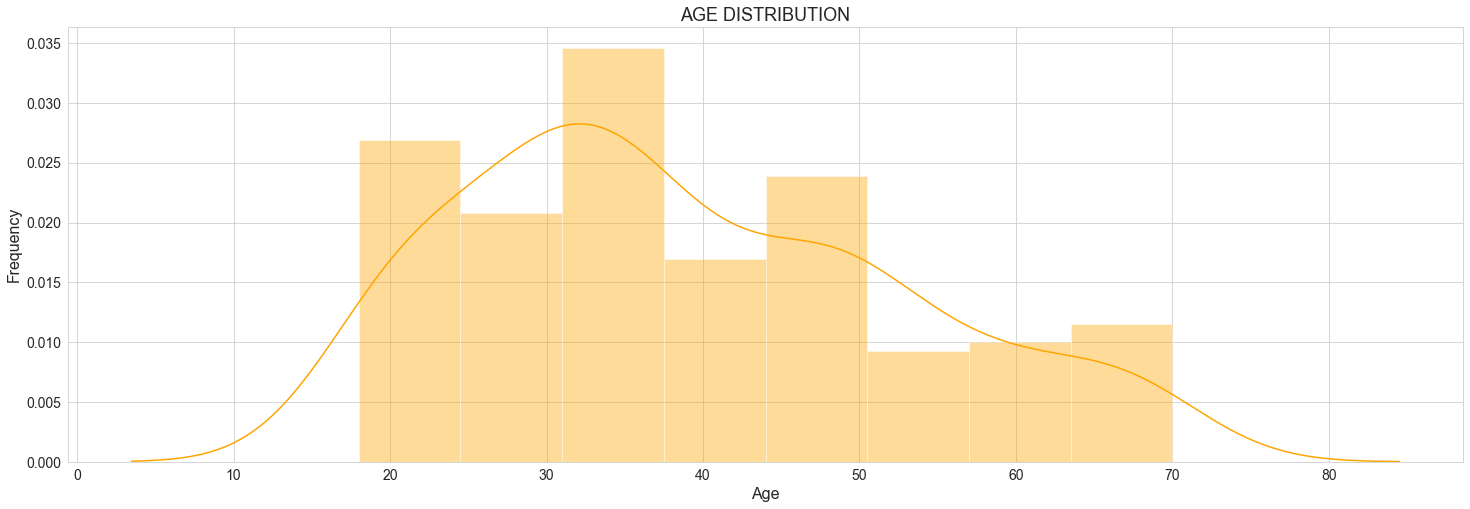

In [6]:
# Age distribution

print(mall_df['Age'].describe())

sb.distplot(mall_df['Age'], 
            color = 'orange')
plt.title('AGE DISTRIBUTION', 
          fontsize = 18)
plt.xlabel('Age', 
           fontsize = 16)
plt.ylabel('Frequency', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('age_distribution.png')
plt.show()

In [7]:
#Adding Age Category
mall_df["age_cat"] = pd.cut(
                       mall_df['Age'],
                       bins = [0,35,55,100],          

                       labels= ["j", "m", "v"]
                      )

C:\Users\Imen\anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


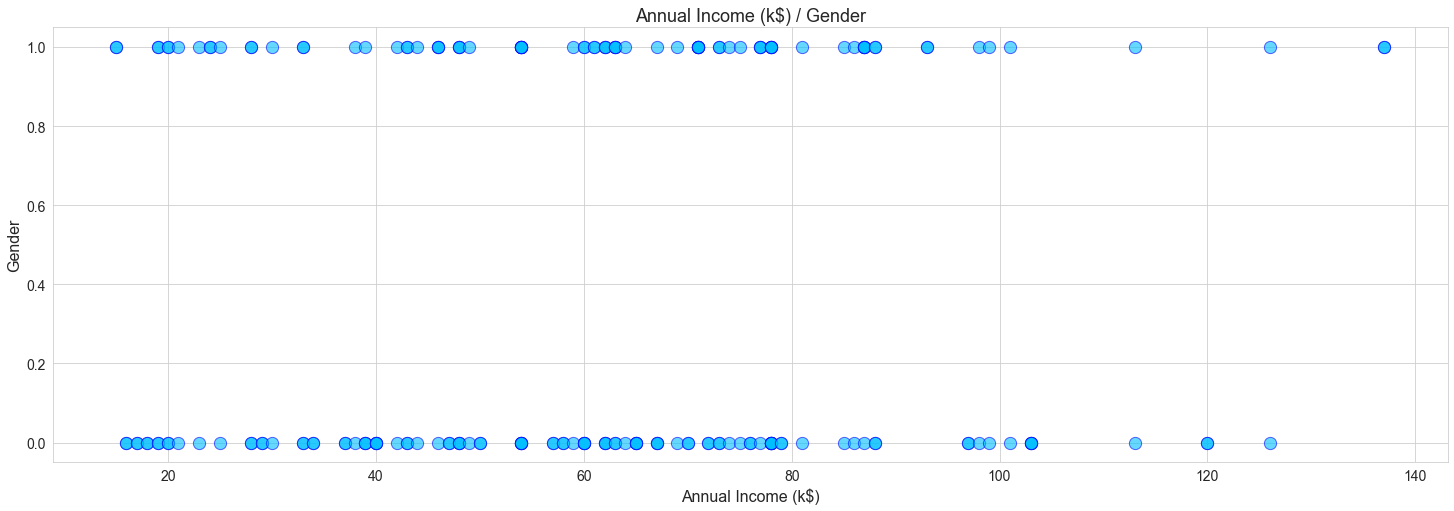

In [8]:
#income vs sex

sb.scatterplot('Annual Income (k$)', 'Gender', 
               data = mall_df, 
               color = 'deepskyblue', 
               s = 150, 
               alpha = 0.6, 
               edgecolor = 'b')
plt.title('Annual Income (k$) / Gender', 
          fontsize = 18)
plt.xlabel('Annual Income (k$)', 
           fontsize = 16)
plt.ylabel('Gender', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('Annual Income (k$)_Gender.png')
plt.show()

In [9]:
#Adding income Category
mall_df["income_cat"] = pd.cut(
                          mall_df['Annual Income (k$)'],
                           bins = 3,
                           labels= ["l", "m", "h"]
                         )

In [10]:
mall_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),age_cat,income_cat
0,1,19,15,39,j,l
1,1,21,15,81,j,l
2,0,20,16,6,j,l
3,0,23,16,77,j,l
4,0,31,17,40,j,l
...,...,...,...,...,...,...
195,0,35,120,79,j,h
196,0,45,126,28,m,h
197,1,32,126,74,j,h
198,1,32,137,18,j,h


In [11]:
#Use seaborn to understand each feature and relationships among features

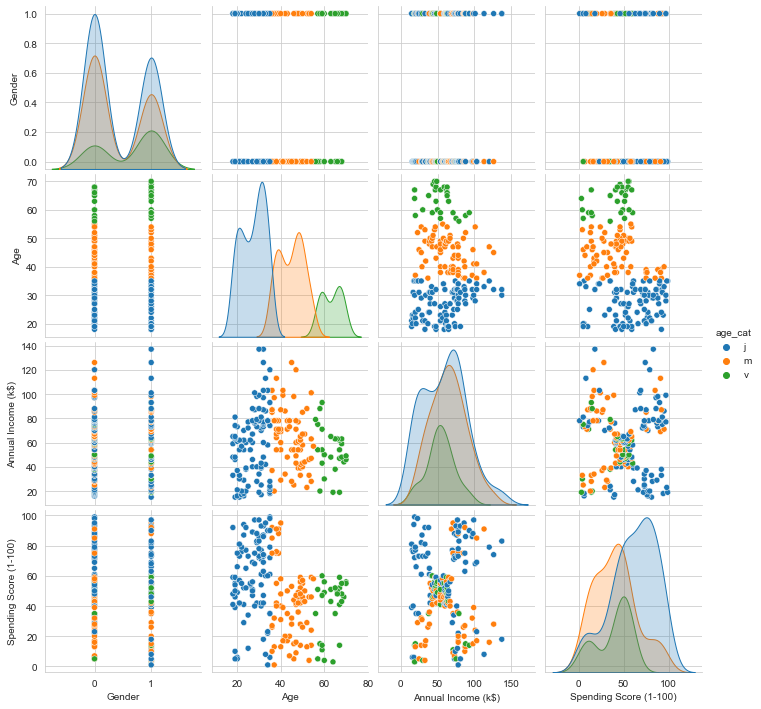

In [12]:
# Shows the relationship of each figure

sns.pairplot(hue="age_cat",data=mall_df)

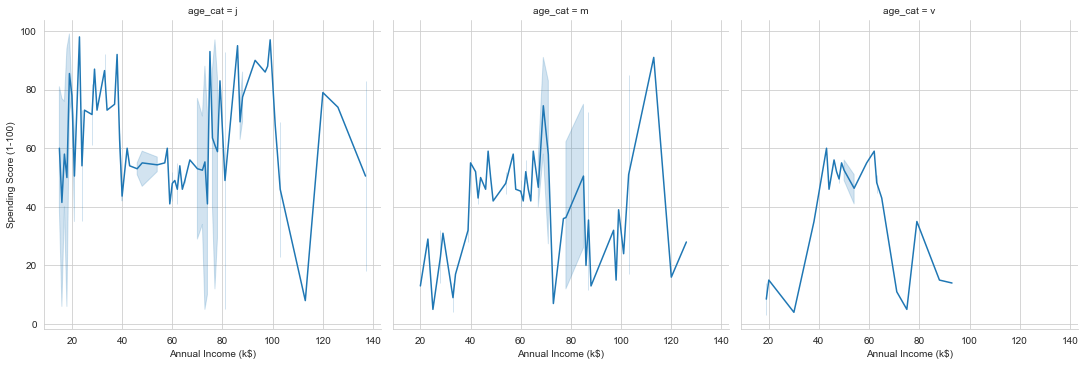

In [13]:
# Shows the relationship between annual income and spending score by line plot

sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)', col='age_cat',kind="line",data=mall_df)

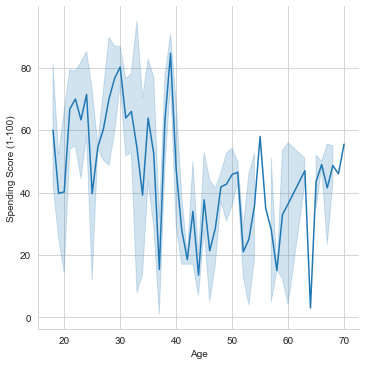

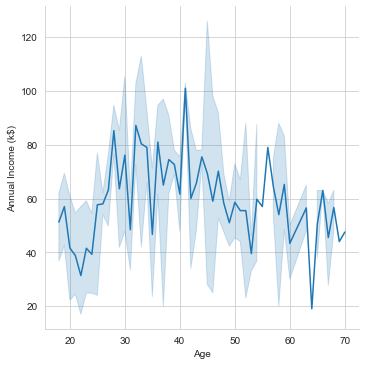

In [14]:
sns.relplot(x='Age', y='Spending Score (1-100)', kind="line",data=mall_df)
sns.relplot(x='Age', y='Annual Income (k$)', kind="line",data=mall_df)

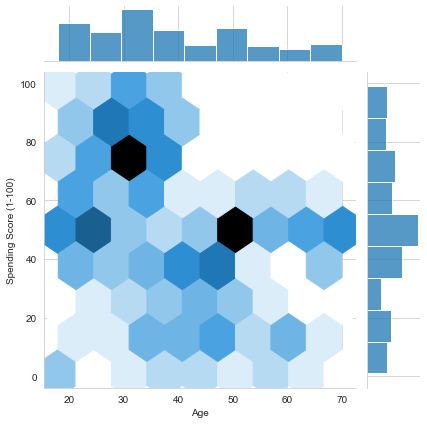

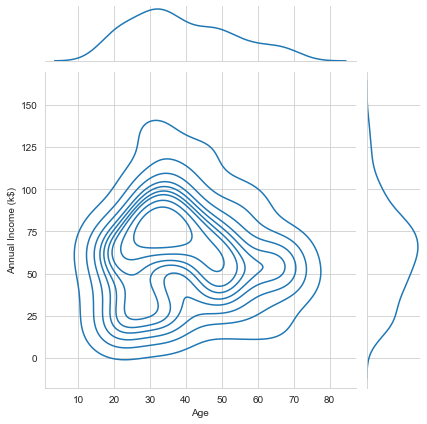

In [15]:
#sns.jointplot(x="x", y="y", data=df)
sns.jointplot(x='Age', y='Spending Score (1-100)', kind = "hex", data=mall_df)
sns.jointplot(x='Age', y='Annual Income (k$)', kind="kde",data=mall_df)

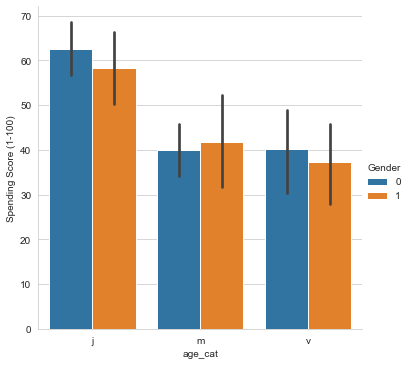

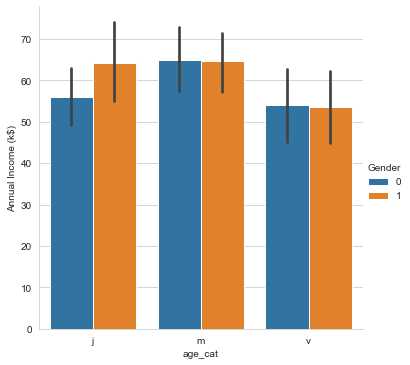

In [16]:
sns.catplot(x='age_cat', y='Spending Score (1-100)', kind = "bar", hue = 'Gender', data=mall_df)
sns.catplot(x='age_cat', y='Annual Income (k$)', kind="bar", hue = 'Gender', data=mall_df)

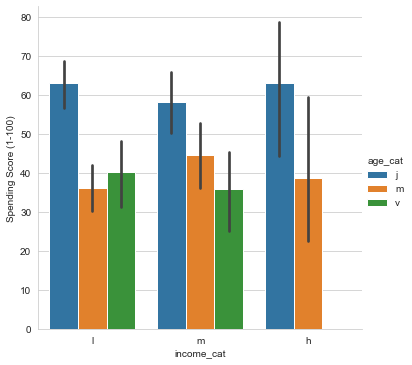

In [17]:
sns.catplot(x='income_cat', y='Spending Score (1-100)', kind = "bar", hue = 'age_cat', data=mall_df)

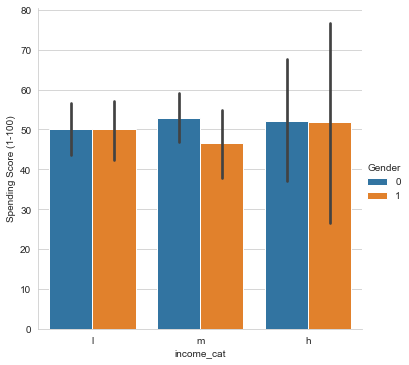

In [18]:
sns.catplot(x='income_cat', y='Spending Score (1-100)', kind = "bar", hue = 'Gender', data=mall_df)

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

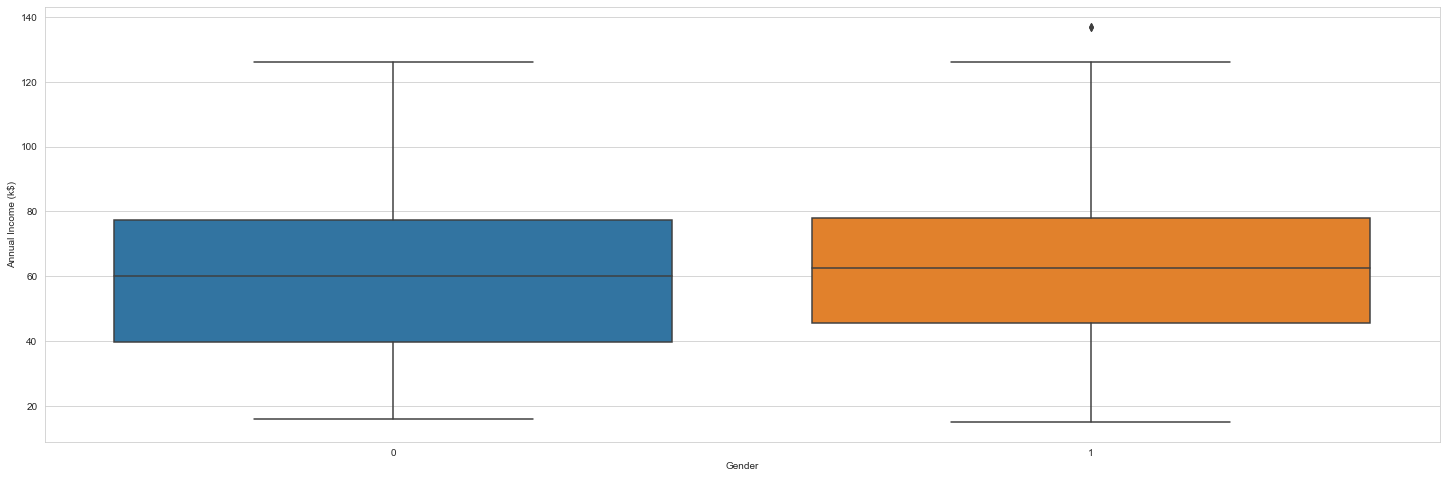

In [19]:
#box plot Gender vs Annual_Income_k
sns.boxplot(x = 'Gender', y = 'Annual Income (k$)', data = mall_df)

<AxesSubplot:>

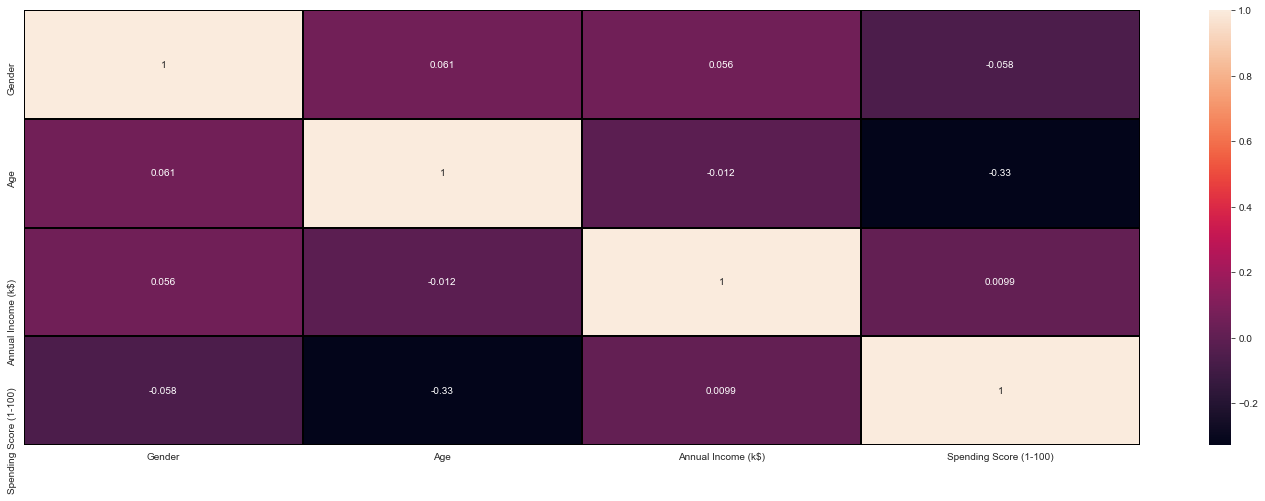

In [20]:
sns.heatmap(mall_df.corr(), linecolor = 'black', linewidth = 1, annot = True)

# la méthode gaussienne

In [21]:
#Drop Categorical Values
mall_df.drop(columns=['age_cat', 'income_cat'], inplace=True)

In [22]:
# Scaling using StandardScaler
ss = StandardScaler()
ss.fit(mall_df)
X = ss.transform(mall_df)

In [23]:
gm = GaussianMixture(
                     n_components = 2,
                     n_init = 10,
                     max_iter = 100)

In [24]:
# 4.2 Train the algorithm
gm.fit(X)

GaussianMixture(n_components=2, n_init=10)

In [25]:
# 4.3 Where are the clsuter centers
gm.means_

array([[-0.88640526, -0.05395317, -0.05000195,  0.05150789],
       [ 1.12815215,  0.06866767,  0.06363885, -0.0655555 ]])

In [26]:
#  Did algorithm converge?
gm.converged_

True

In [27]:
#  How many iterations did it perform?
gm.n_iter_

2

In [28]:
#  Clusters labels
gm.predict(X)

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1], dtype=int64)

In [29]:
#  Weights of respective gaussians.
gm.weights_

array([0.56, 0.44])

In [30]:
# What is the frequency of data-points
# for the three clusters. (np.unique()
#ouputs a tuple with counts at index 1)
np.unique(gm.predict(X), return_counts = True)[1]/len(X)

array([0.56, 0.44])

In [31]:
#  GMM is a generative model.
#     Generate a sample from each cluster
#     ToDo: Generate digits using MNIST
gm.sample()

(array([[ 1.1282897 , -0.84775108, -0.53498497, -0.63811697]]), array([1]))

C:\Users\Imen\anaconda31\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Imen\anaconda31\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Imen\anaconda31\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Imen\anaconda31\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows wi

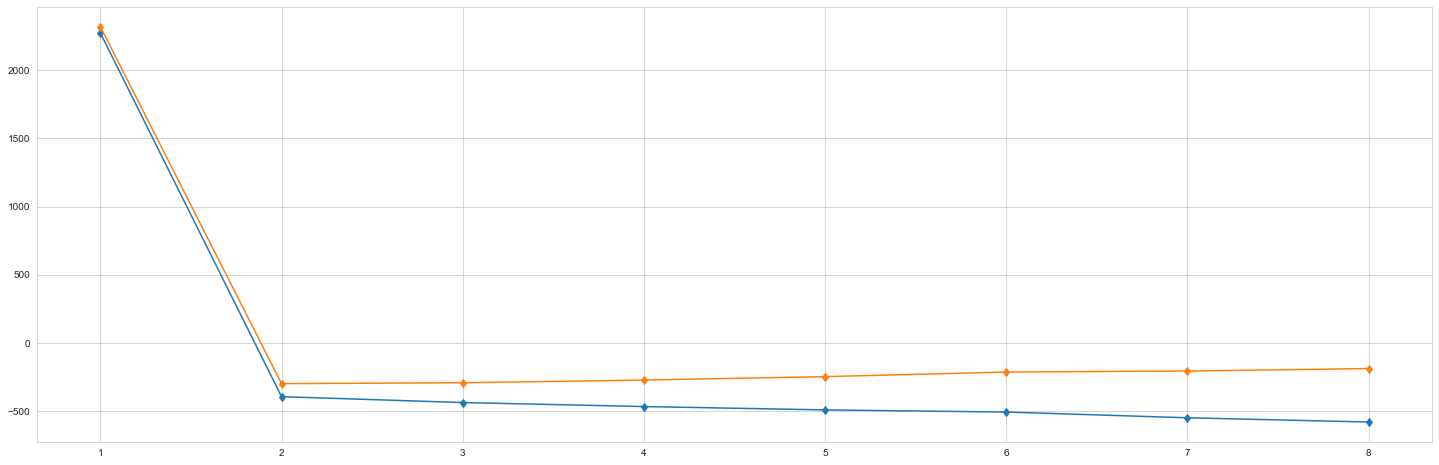

In [53]:
bic = []
aic = []
for i in range(8):
    gm = GaussianMixture(
                     n_components = i+1,
                     n_init = 10,
                     max_iter = 100)
    gm.fit(X)
    bic.append(gm.bic(X))
    aic.append(gm.aic(X))
    
# Look at the plots

fig = plt.figure()
plt.plot([1,2,3,4,5,6,7,8], aic, marker = "d", label = 'aic')
plt.plot([1,2,3,4,5,6,7,8], bic, marker = "d", label = 'bic')
plt.show()

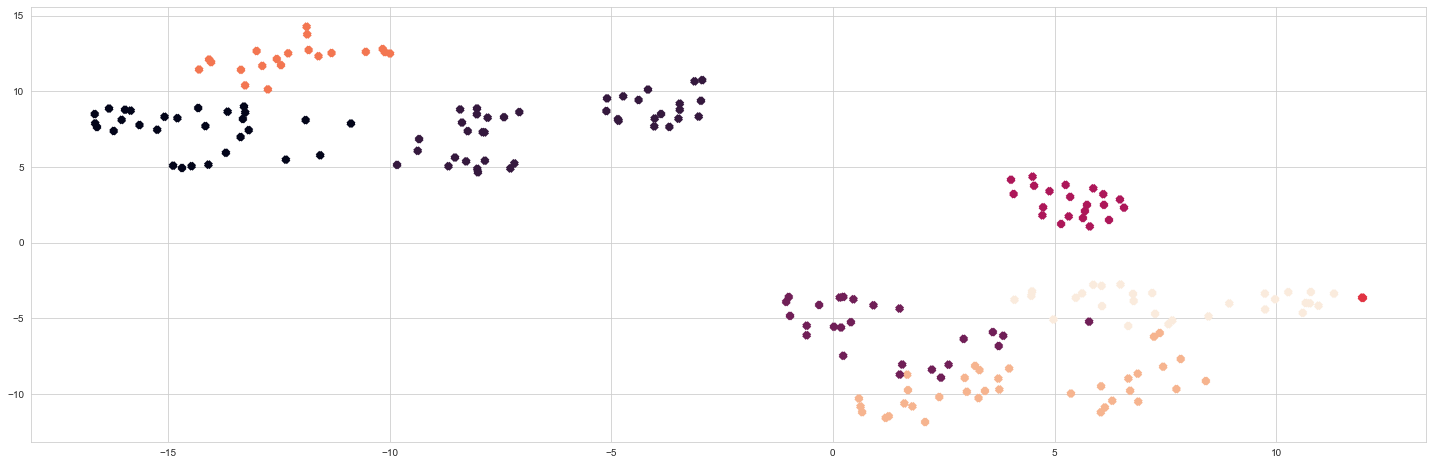

In [56]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2)
tsne_out = tsne.fit_transform(X)
plt.scatter(tsne_out[:, 0], tsne_out[:, 1],
            marker='x',
            s=30,              # marker size
            linewidths=5,      # linewidth of marker edges
            c=gm.predict(X)   # Colour as per gmm
            )

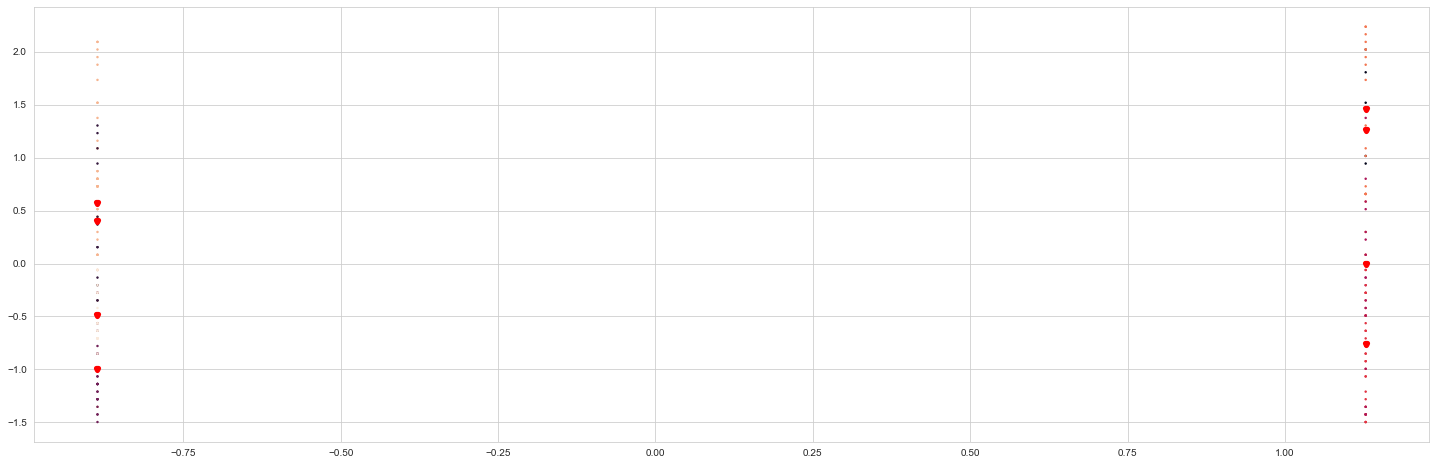

In [40]:
#  Plot cluster and cluster centers
#     both from kmeans and from gmm

fig = plt.figure()

# 5.1
plt.scatter(X[:, 0], X[:, 1],
            c=gm.predict(X),
            s=2)
# 5.2
plt.scatter(gm.means_[:, 0], gm.means_[:, 1],
            marker='v',
            s=5,               # marker size
            linewidths=5,      # linewidth of marker edges
            color='red'
            )
plt.show()

In [41]:
densities = gm.score_samples(X)
densities

array([ 0.53249079,  0.49025256, -0.90252212,  1.68387025, -0.68960158,
        1.55990446,  0.6436694 ,  2.10303117,  1.75438227,  1.60956178,
        2.17568294, -0.17812259,  0.4832769 ,  2.57820941, -1.9453384 ,
        1.07144706,  1.19840295,  1.52883801,  1.76322556, -0.58848086,
       -2.27576721,  1.85410985,  0.40618671,  1.57883054,  1.24007314,
        1.5944932 ,  2.64819241,  0.67024281,  2.74038413,  2.44678856,
        2.71257502,  2.99387466,  2.45771424, -0.70519072,  1.52285283,
        2.62595241,  2.07983162,  3.21899907,  2.67745259,  2.80639596,
        1.64493319,  0.88225668,  0.08721889,  2.86062782,  2.98780847,
        3.74286387,  1.80062303,  2.0239224 ,  2.14212402,  2.36515979,
        2.51722269,  1.74109499,  2.72300263,  1.69198614,  3.20775512,
        1.92932932,  2.88015203,  2.06843099,  3.25992574,  3.22706107,
        2.46145497,  1.83693419,  1.41738527,  1.95212632,  3.43061836,
        1.68877191,  3.09731801,  1.56470024,  1.89912867,  2.77

In [42]:
density_threshold = np.percentile(densities,4)
density_threshold

-0.592525690449377

In [43]:
anomalies = X[densities < density_threshold]
anomalies
anomalies.shape

(8, 4)

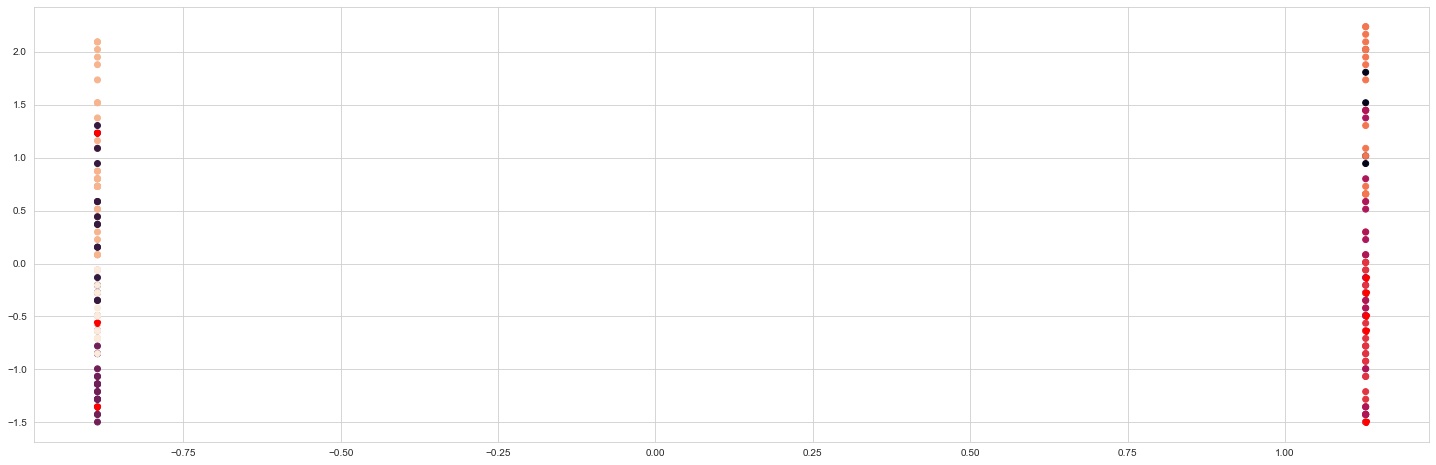

In [44]:
# Show anomalous points
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c = gm.predict(X))
plt.scatter(anomalies[:, 0], anomalies[:, 1],
            marker='v',
            s=5,               # marker size
            linewidths=5,      # linewidth of marker edges
            color='red'
            )
plt.show()

In [45]:
# 7.1 Get first unanomalous data
unanomalies = X[densities >= density_threshold]
unanomalies.shape  

(192, 4)

In [46]:
# 7.2 Transform both anomalous and unanomalous data
#     to pandas DataFrame
df_anomalies = pd.DataFrame(anomalies, columns = mall_df.columns.values)
df_anomalies['UnAn_or_An'] = 'anomalous'   # Create a IIIrd constant column
df_anomalies
df_normal = pd.DataFrame(unanomalies, columns = mall_df.columns.values)
df_normal['UnAn_or_An'] = 'unanomalous'    # Create a IIIrd constant column

In [47]:
df_anomalies

,Gender,Age,Annual Income (k$),Spending Score (1-100),UnAn_or_An
0,-0.886405,-1.352802,-1.700830,-1.715913,anomalous
1,-0.886405,-0.563369,-1.662660,-0.395980,anomalous
2,1.128152,-0.132768,-1.548152,-1.444162,anomalous
3,1.128152,-0.276302,-1.395474,-0.590088,anomalous
4,1.128152,-1.496335,-1.051949,1.622741,anomalous
5,-0.886405,1.230799,0.703844,-0.590088,anomalous
6,1.128152,-0.491602,2.917671,-1.250054,anomalous
7,1.128152,-0.635135,2.917671,1.273347,anomalous


In [48]:
df_normal

,Gender,Age,Annual Income (k$),Spending Score (1-100),UnAn_or_An
0,1.128152,-1.424569,-1.738999,-0.434801,unanomalous
1,1.128152,-1.281035,-1.738999,1.195704,unanomalous
2,-0.886405,-1.137502,-1.700830,1.040418,unanomalous
3,-0.886405,-1.209269,-1.662660,1.001596,unanomalous
4,-0.886405,-0.276302,-1.624491,-1.715913,unanomalous
...,...,...,...,...,...
187,-0.886405,-0.061002,2.001605,1.583920,unanomalous
188,-0.886405,0.584899,2.268791,-1.327697,unanomalous
189,-0.886405,-0.276302,2.268791,1.118061,unanomalous
190,-0.886405,0.441365,2.497807,-0.861839,unanomalous


C:\Users\Imen\anaconda31\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Imen\anaconda31\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

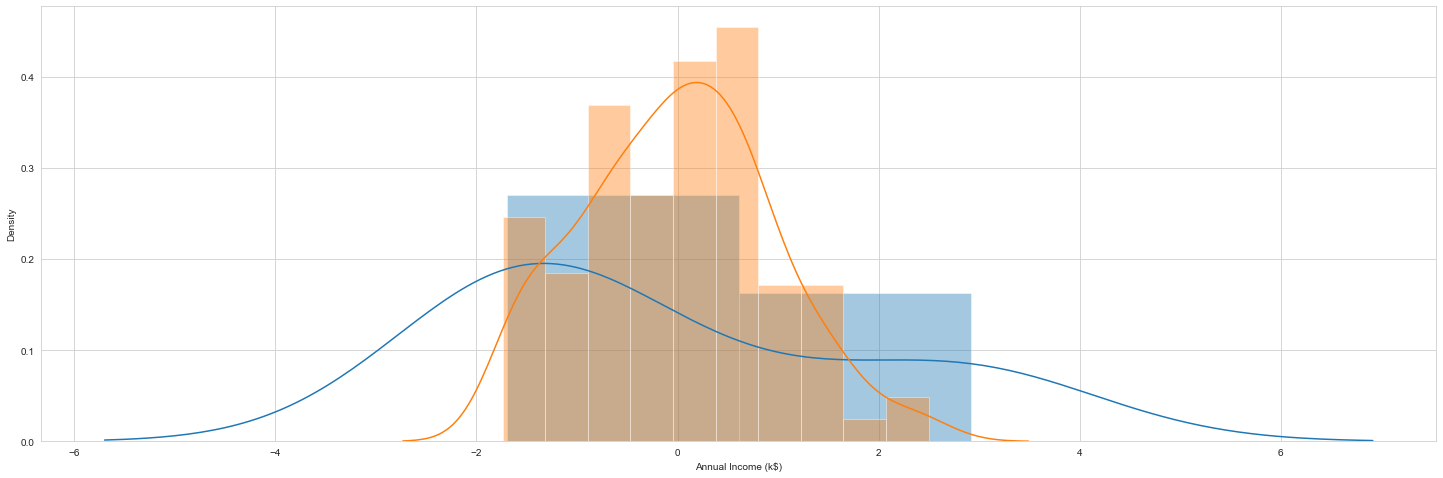

In [49]:
# Let us see density plots
sns.distplot(df_anomalies['Annual Income (k$)'])
sns.distplot(df_normal['Annual Income (k$)'])

C:\Users\Imen\anaconda31\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Imen\anaconda31\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

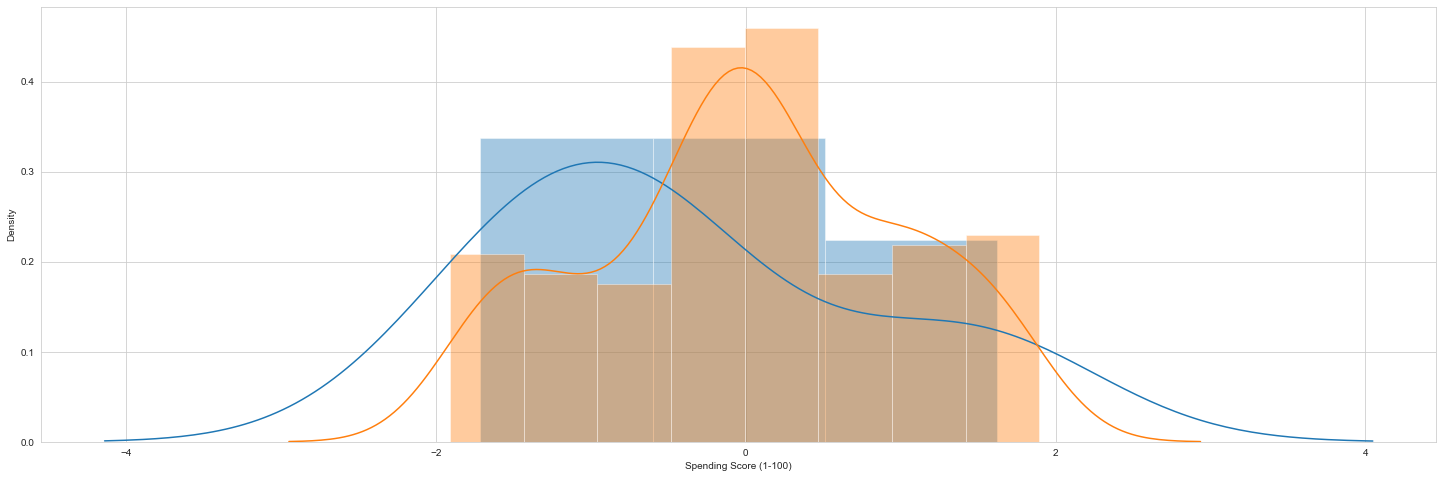

In [50]:
#  Let us see density plots
sns.distplot(df_anomalies['Spending Score (1-100)'])
sns.distplot(df_normal['Spending Score (1-100)'])

<AxesSubplot:xlabel='UnAn_or_An', ylabel='Spending Score (1-100)'>

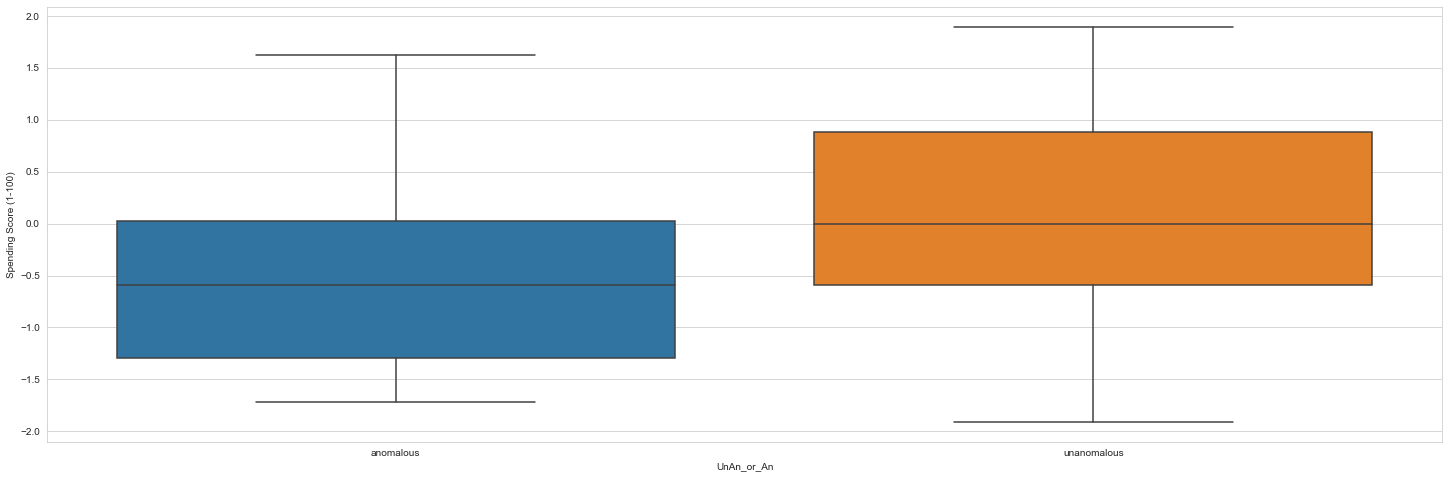

In [51]:
df1 = pd.concat([df_anomalies,df_normal])
sns.boxplot(x = df1['UnAn_or_An'], y = df1['Spending Score (1-100)'])

<AxesSubplot:xlabel='UnAn_or_An', ylabel='Annual Income (k$)'>

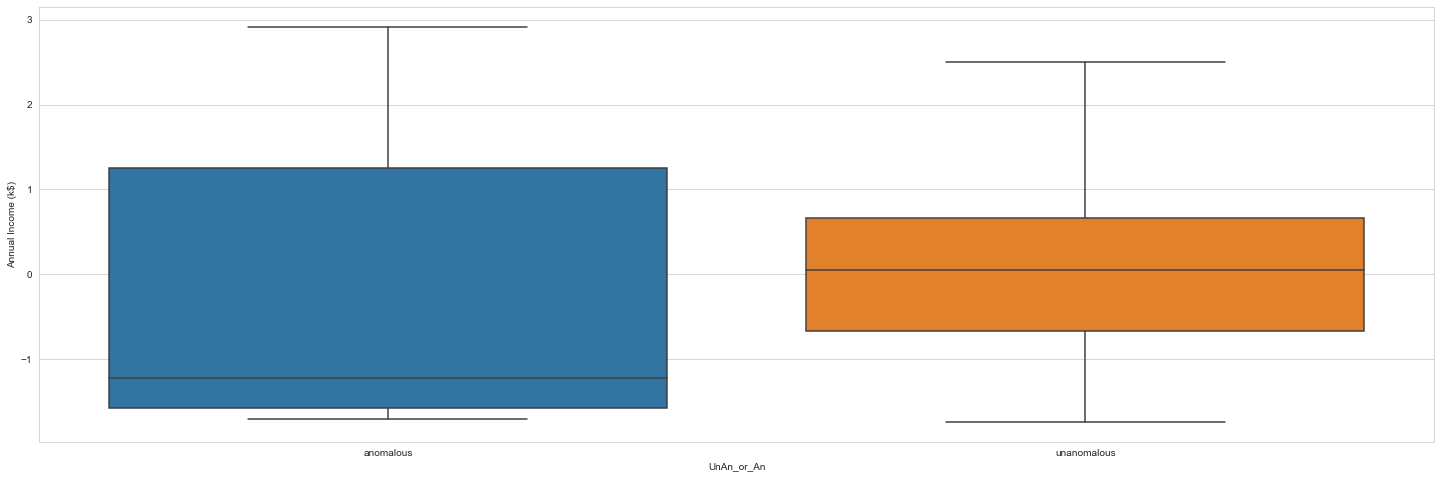

In [52]:
sns.boxplot(x = df1['UnAn_or_An'], y = df1['Annual Income (k$)'])

# Conclusions